# Importing the classifier pickle
NOTE: pickle must contain the trained __classifier__, not just the model.

In [3]:
import os
import math
import json
import pickle
import numpy as np
import statistics as stats

from sklearn import tree
from pandas import DataFrame
from matplotlib import pyplot as plt
# ------ Fill this in to specify which pickle should be opened ------
# --- NOTE: should include full path and filename but NO extension ---
file = "/Users/tylerskluzacek/Dropbox/THESIS/e_etc-head-512-cdiac-ml-best.csv-2022-04-13-21.05.16"
# file = "/Users/tylerskluzacek/e_etc-head-16-cdiac-ml-best.csv-2022-04-13-20.33.07"
# --------------------------------------------------------------

byte_count = int(file.split("/")[-1].split("-")[2])

classifier_path = f"{file}.pkl"
# Syler uncommented 1 of 2
#info_metrics_path = f"{file}-info-{byte_count}Bytes.json"
# info_metrics = json.load(open(info_metrics_path))

os.chdir('/Users/tylerskluzacek/XtractPredictor/')
classifier = pickle.load(open(classifier_path, "rb"))
os.chdir('/Users/tylerskluzacek/Desktop/xtract-research-notebooks/')

# Syler uncommented 2 of 2
# for key in info_metrics.keys():
#     print(key)
#     print(f'\t{info_metrics[key]}')

# precision = info_metrics['Model precision']
# recall = info_metrics['Model recall']
# print(f'F1-Score\n\t{2*precision*recall/(precision+recall)}')

In [4]:
# Now let's see if we can access all of the predictions
# import time 
# for item in classifier.Y_test: 
#     print(item)
#     time.sleep(1)

# Decision tree visualization
Acceptable classifiers:
- Decision tree classifier (dtc)
- Single-tree extra tree classifier (t_etc)

NOTE: If decision tree has too high of a maximum depth, this visualization will be illegible. I recommend setting max_depth to 3.

AttributeError: 'ExtraTreesClassifier' object has no attribute 'tree_'

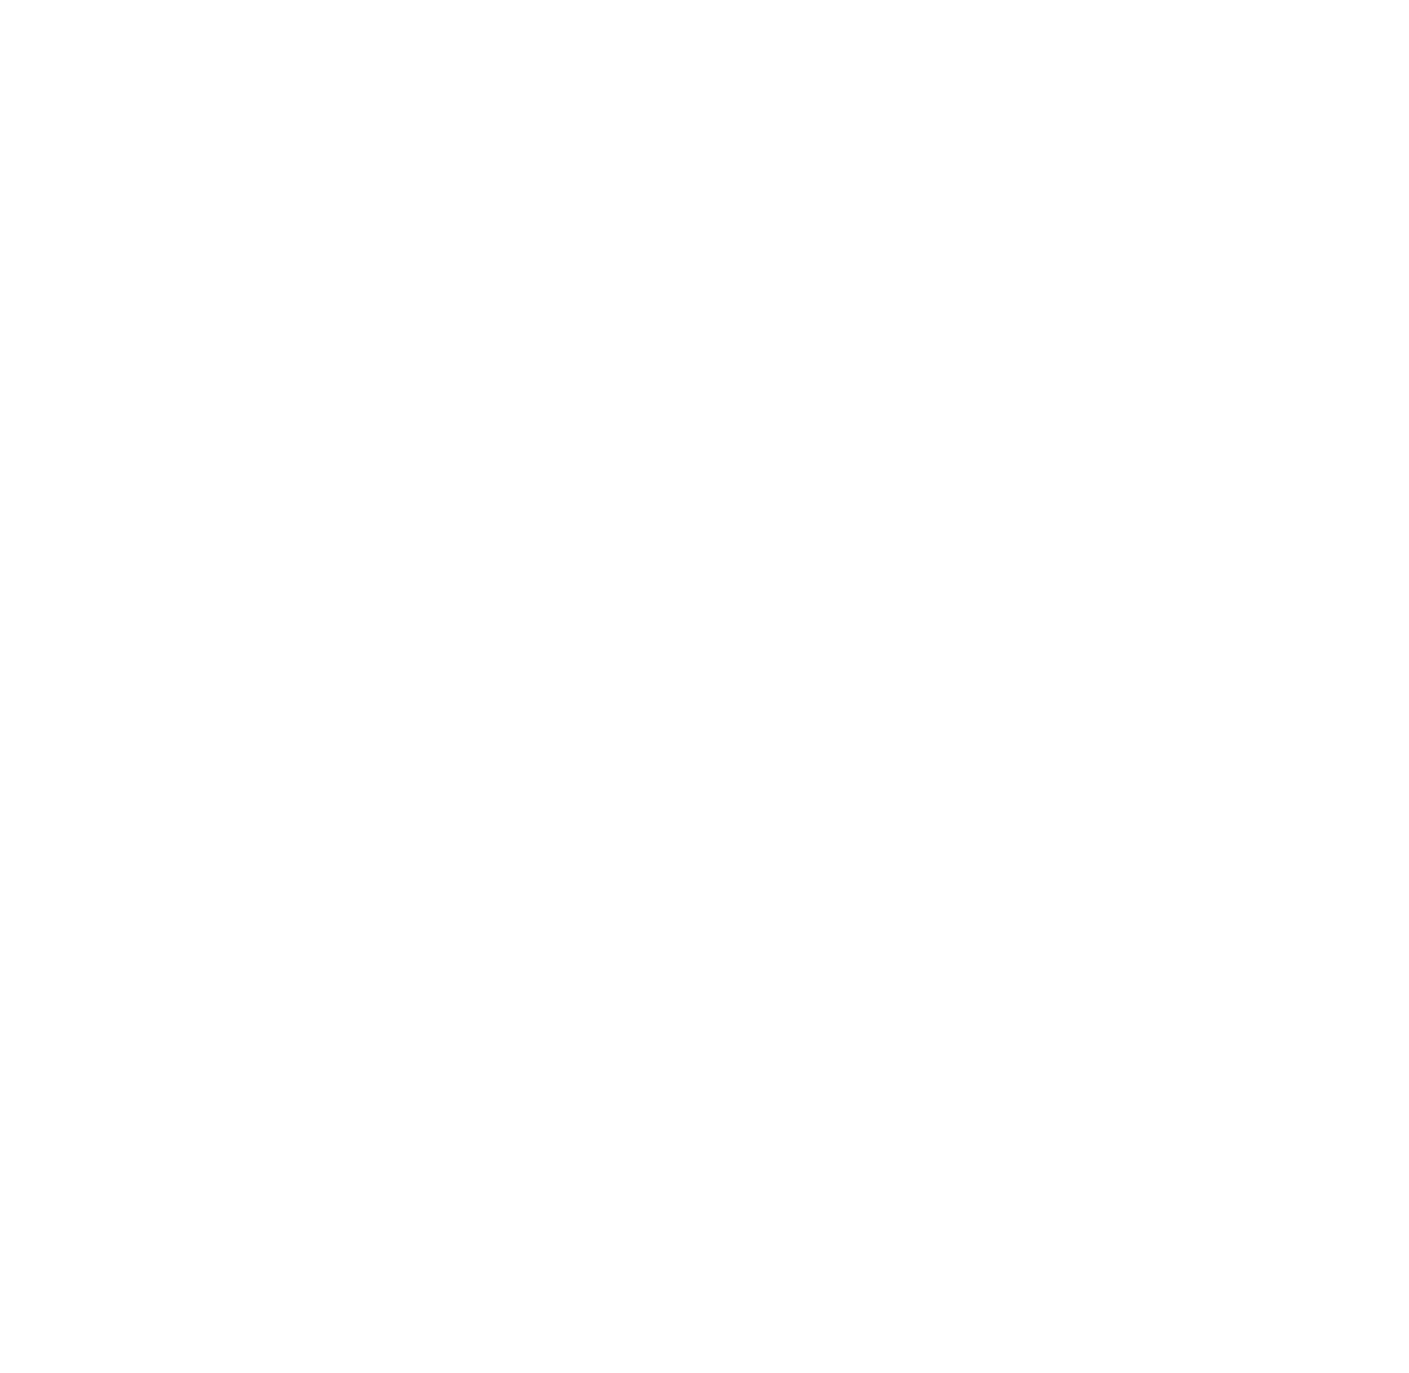

In [5]:
fig = plt.figure(figsize=(25, 25))
_ = tree.plot_tree(classifier.model,
                   filled=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
label_legend = ""
for label in classifier.unique_labels:
    label_legend += (label + "\n")
fig.text(0.13, 0.7, label_legend[:-1], fontsize=25, bbox=props)

# HeadByte heatmap visualization
*Acceptable classifiers: any*

In [6]:
y_pred = classifier.model.predict(classifier.X_test)

# Building a dictionary of the predicted (multi)labels and their corresponding binary lists

unique_rows = np.unique(y_pred, axis=0)
unique_dict = {}
for unique_row in unique_rows:
    labels = []
    for pair in zip(unique_row, classifier.unique_labels):
        if pair[0]:
            labels.append(pair[1])
    if len(labels) == 0:
        labels.append("unknown")
    unique_dict[", ".join(labels)] = unique_row
    
# Building a dictionary of all the feature info for each predicted label

large_dict = {}
for key in unique_dict.keys():
    large_dict[key] = []

for i in range(len(classifier.X_test)):
    for key in unique_dict.keys():
        if np.all(y_pred[i]==unique_dict[key]):
            large_dict[key].append(classifier.X_test[i].tolist())
            break

sample_counts = "Predicted sample counts\n\n"
for key in large_dict.keys():
    sample_counts += key + " : " + str(len(large_dict[key])) + "\n"

print("The labels and their binarized lists:")
for key in unique_dict.keys():
    print(key)
    print(unique_dict[key])

The labels and their binarized lists:
unknown
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
executable
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
jsonxml
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
tabular
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
images
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
compressed
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
netcdf
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
empty
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
keyword
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
keyword, jsonxml
[0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
keyword, tabular
[0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
keyword, python, tabular
[0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
keyword, netcdf
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
c-code, keyword
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Average value heatmap

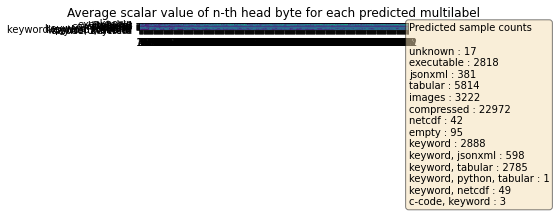

In [7]:
# Averaging the features for each bit

avgs = []
for key in large_dict.keys():
    lst = large_dict[key]
    lst = [list(x) for x in zip(*lst)]
    lst = [stats.mean(x) for x in lst]
    avgs.append(lst)
    
# UNCOMMENT to fill in empty labels in case you run on a limited range of samples

# for i in range(len(avgs)):
#     if (len(avgs[i])==0):
#         avgs[i] = [0.0] * byte_count

# Creating the plot

fig, ax1 = plt.subplots()

# Label y axis side with the class name

y1_axis_labels = large_dict.keys()
ax1.set_yticks(np.arange(len(y1_axis_labels)), labels=y1_axis_labels)

# Plot the heatmap set good x-axis ticks
# fig.set_size_inches((2*byte_count)/10, 10.5) # UNCOMMENT FOR LARGER BYTECOUNTS
plt.imshow(np.array(avgs))
plt.xticks(ticks=[i for i in range(byte_count)], labels=[i+1 for i in range(byte_count)])

# Adding title and sample count legend

ax1.set_title("Average scalar value of n-th head byte for each predicted multilabel")
plt.tight_layout()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(byte_count, -0.25, sample_counts[:-1], fontsize=10,
         verticalalignment='top', bbox=props)

plt.savefig('/Users/tylerskluzacek/thing.png', bbox_inches='tight') 

## Standard deviation heatmap

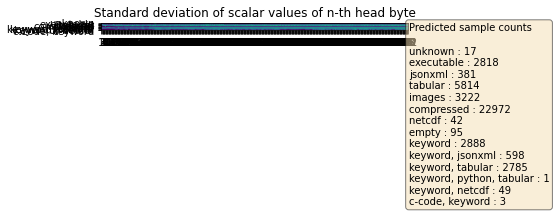

In [8]:
# Finding the standard deviation for each bit

stdevs = []
y_axis_labels = []
for key in large_dict.keys():
    lst = large_dict[key]
    lst = [list(x) for x in zip(*lst)]
    if (len(lst[0])>1):
        lst = [stats.stdev(x) for x in lst]
        stdevs.append(lst)
        y_axis_labels.append(key)
    
# UNCOMMENT to fill in empty labels in case you run on a limited range of samples

# for i in range(len(stdevs)):
#     if (len(stdevs[i])==0):
#         stdevs[i] = [0.0] * byte_count

# Creating the plot

fig, ax = plt.subplots()
im = ax.imshow(np.array(stdevs))

# Show all ticks and label them with the respective list entries

ax.set_yticks(np.arange(len(y_axis_labels)), labels=y_axis_labels)

# Plot the heatmap set good x-axis ticks

#  fig.set_size_inches(18.5, 10.5) # UNCOMMENT FOR LARGER BYTECOUNTS
plt.imshow(np.array(stdevs))
plt.xticks(ticks=[i for i in range(byte_count)], labels=[i+1 for i in range(byte_count)])

# Adding title and sample count legend

ax1.set_title("Standard deviation of scalar values of n-th head byte")
plt.title("Standard deviation of scalar values of n-th head byte")
plt.tight_layout()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(byte_count, -0.25, sample_counts[:-1], fontsize=10,
         verticalalignment='top', bbox=props)

plt.savefig('/Users/tylerskluzacek/thing2.png', bbox_inches='tight') 

# Multilabel Confusion Matrices
*Acceptable classifiers: any*

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=16):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes, annot_kws={"fontsize":fontsize})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label', fontsize=fontsize)
    axes.set_xlabel('Predicted label', fontsize=fontsize)
    axes.set_title("Class - " + class_label, fontsize=fontsize)

y_pred = classifier.model.predict(classifier.X_test)
    
# Some customizable values here, first two values should multiply to at least label count
fig, ax = plt.subplots(2, 5, figsize=(20, 7))
    
multilabel_confusion_matrix = multilabel_confusion_matrix(y_pred, classifier.Y_test)
multilabel_labels = classifier.unique_labels

for axes, cfs_matrix, label in zip(ax.flatten(), multilabel_confusion_matrix, multilabel_labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
    
fig.tight_layout()
#plt.show()
plt.savefig('/Users/tylerskluzacek/Desktop/ml-confusion-matrices.png')

# Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = len(classifier.Y_test[0])
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(classifier.Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(classifier.Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_pred = classifier.model.predict(classifier.X_test)
    
multilabel_confusion_matrix = multilabel_confusion_matrix(y_pred, classifier.Y_test)
multilabel_labels = classifier.unique_labels

# for axes, cfs_matrix, label in zip(ax.flatten(), multilabel_confusion_matrix, multilabel_labels):
#     print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])
tps = []
fps = []
fns = []
for cfs_matrix, label in zip(multilabel_confusion_matrix, multilabel_labels):
    print(label)
    print(cfs_matrix)
    tps.append(cfs_matrix[1][1])
    fps.append(cfs_matrix[0][1])
    fn = cfs_matrix[1][0]

micro_prec_avg = sum(tps) / (sum(tps)+sum(fps))
micro_recall_avg = sum

print(classifier.unique_labels)

/Users/tylerskluzacek/opt/anaconda3/envs/jupyter_primary/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tylerskluzacek/opt/anaconda3/envs/jupyter_primary/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tylerskluzacek/opt/anaconda3/envs/jupyter_primary/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tylerskluzacek/opt/anaconda3/envs/jupyter_primary/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/tylerskluzacek/opt/anaconda3/envs/jupyter_primary/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear fa

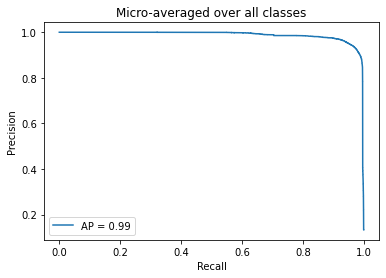

In [2]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

random_state = np.random.RandomState(0)

y = []
y.extend(classifier.Y_train)
y.extend(classifier.Y_test)

X = []
X.extend(classifier.X_train)
X.extend(classifier.X_test)

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=random_state
)

ovr_classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
)
ovr_classifier.fit(X_train, Y_train)
y_score = ovr_classifier.decision_function(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    Y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(Y_test, y_score, average="micro")

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

plt.savefig("all_classes_cdiac_512.png")